In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss

In [2]:
df=pd.read_excel(r"C:\Users\parth\Downloads\Data.xlsx")

It is a Banking loan dataset where we predict whether the personal loan gets approved or not.

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


There are no categorical features

Checking for null values

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no null values in the dataset.

checking for outliers

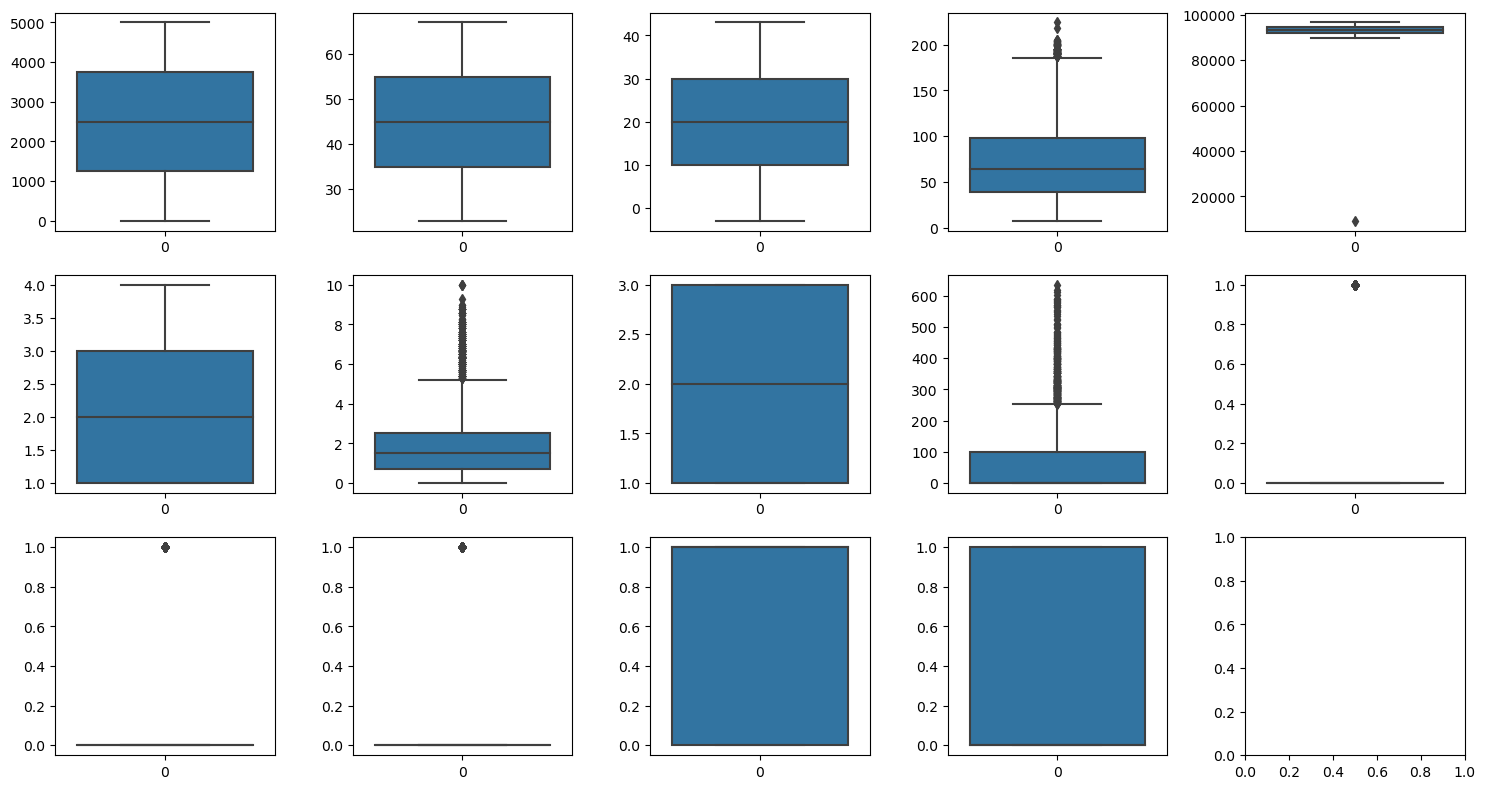

In [9]:

fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize=(15, 8))
for i, subplot in zip(df.columns, ax.flatten()):   
    sns.boxplot(df[i], ax = subplot)
plt.tight_layout()
plt.show()

In [10]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR =q3-q1
IQR

ID                    2499.5
Age                     20.0
Experience              20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64

In [11]:
df1 = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
9,10,34,9,180,93023,1,8.900000,3,0,1,0,0,0,0
12,13,48,23,114,93106,2,3.800000,3,0,0,1,0,0,0
14,15,67,41,112,91741,1,2.000000,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4964,32,6,98,95054,2,4.500000,3,306,0,0,0,0,0
4971,4972,58,28,73,90024,1,1.400000,3,0,0,1,0,0,0
4980,4981,29,5,135,95762,3,5.300000,1,0,1,0,1,1,1
4981,4982,34,9,195,90266,2,3.000000,1,122,0,0,0,1,0


In [12]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [13]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [14]:
from sklearn.preprocessing import PowerTransformer 

In [15]:
pt=PowerTransformer()
col=['CCAvg','Mortgage']

In [16]:
df[col]=pt.fit_transform(df[col])

In [17]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 0.032008
Education             0.227093
Mortgage              0.835938
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
x=df.drop(['Personal Loan'],axis=1)
y=df['Personal Loan']

In [20]:
a=['Age','Experience','Income']

In [21]:
s=StandardScaler()

df[a]=s.fit_transform(df[a])

In [23]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,4,0.119408,1,-0.666329,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,3,0.045165,1,-0.666329,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,1,-0.392088,1,-0.666329,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,1,0.754026,2,-0.666329,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,4,-0.392088,2,-0.666329,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,1,0.322137,3,-0.666329,0,0,0,1,0
4996,-1.338194,-1.404454,-1.276892,4,-1.146401,1,1.435356,0,0,0,1,0
4997,1.540880,1.647835,-1.081363,2,-1.312183,3,-0.666329,0,0,0,0,0
4998,1.715370,1.735043,-0.538229,3,-0.994933,2,-0.666329,0,0,0,1,0


Train test split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2)

DecisionTree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import*

In [25]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred_dt=dt.predict(xtest)

In [28]:
accuracy_score(ytest,ypred_dt)

0.985

The Decision tree classifier shows 98.5% accuracy,
Therefore 98.5% it correctly predicted the approval of personal loan.  

In [30]:
classification_report(ytest,ypred_dt)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       907\n           1       0.93      0.90      0.92        93\n\n    accuracy                           0.98      1000\n   macro avg       0.96      0.95      0.95      1000\nweighted avg       0.98      0.98      0.98      1000\n'

These are the other parameter metrics of Decision tree model